In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
# Data Cleaning and Preprocessing

# Handle missing values
df.fillna(df.mean(), inplace=True)  # Replace missing numerical values with the mean

# Check for inconsistencies in data types
print(df.dtypes)

# Detect and treat outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
Outliers:
 LB           10
AC           43
FM          347
UC           13
DL          125
DS          141
DP          305
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         580
dtype: int64


In [9]:
# Exploratory Data Analysis (EDA)

# Calculate statistical summary
summary = df.describe(include='all')

# Print the summary
print(summary)

#Median of Numerical columns
df[['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Tendency','NSP']].median()

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [10]:
# Interesting Findings:

#->'LB' (fetal heart rate baseline) has a mean of 133 bpm with a standard deviation of 9.8. This indicates variability in fetal heart rate.")
#->'AC' (accelerations) has a median of 0, suggesting that accelerations are not present in a significant portion of the recordings.")
#->'NSP' (fetal state class) shows a majority of 'normal' cases (class 1), but further investigation is needed to understand the distribution of other classes.")

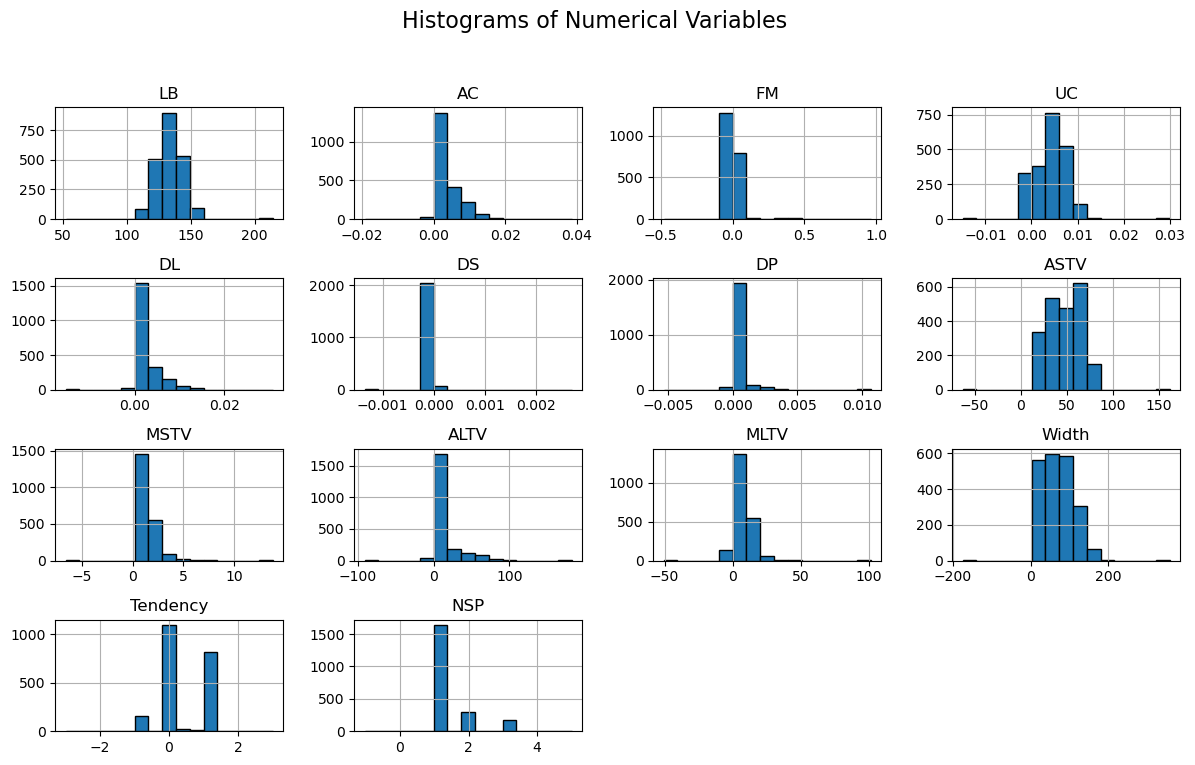

In [18]:
# Data Visualization

# Histograms for numerical variables
df.hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

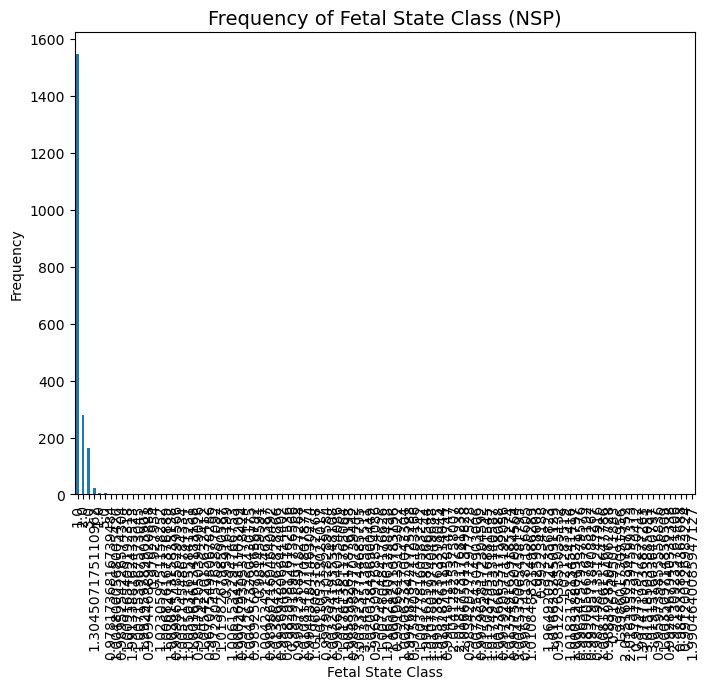

In [19]:
# Bar chart for a categorical variable ('NSP')
plt.figure(figsize=(8, 6))
df['NSP'].value_counts().plot(kind='bar')
plt.title('Frequency of Fetal State Class (NSP)', fontsize=14)
plt.xlabel('Fetal State Class')
plt.ylabel('Frequency')
plt.show()

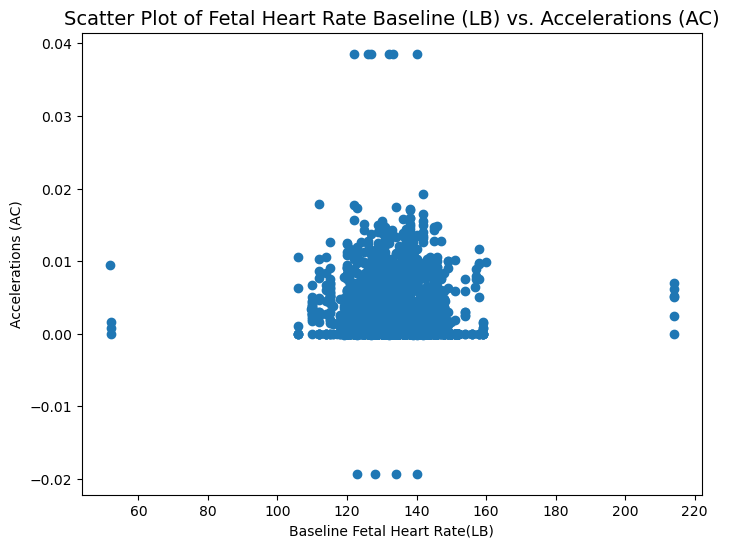

In [20]:
# Scatter plot for two numerical variables (LB' and 'AC')
plt.figure(figsize=(8, 6))
plt.scatter(df['LB'], df['AC'])
plt.title('Scatter Plot of Fetal Heart Rate Baseline (LB) vs. Accelerations (AC)', fontsize=14)
plt.xlabel('Baseline Fetal Heart Rate(LB)')
plt.ylabel('Accelerations (AC)')
plt.show()

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


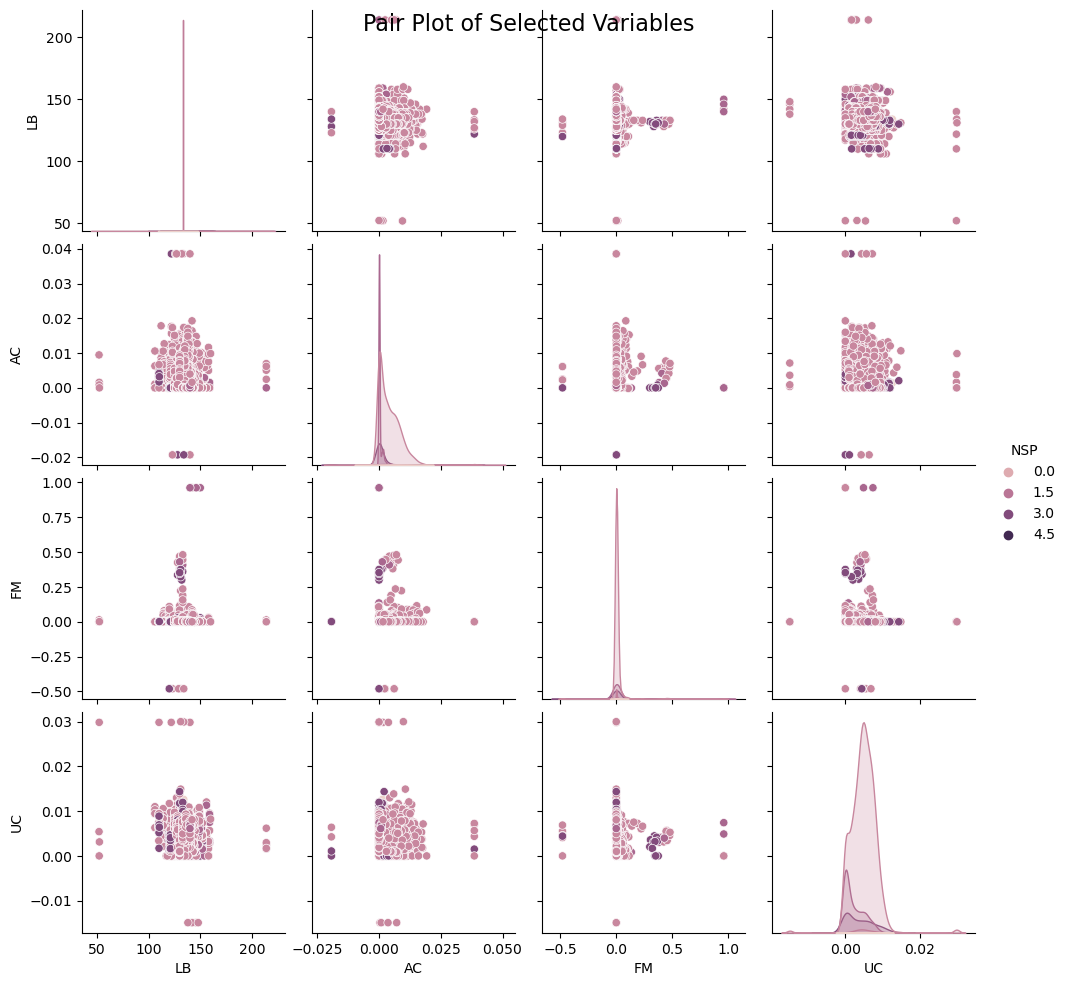

In [21]:
# Pair plot
sns.pairplot(df, vars=['LB', 'AC', 'FM', 'UC'], hue='NSP')
plt.suptitle('Pair Plot of Selected Variables', fontsize=16)
plt.show()

In [16]:
# Correlation Analysis
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


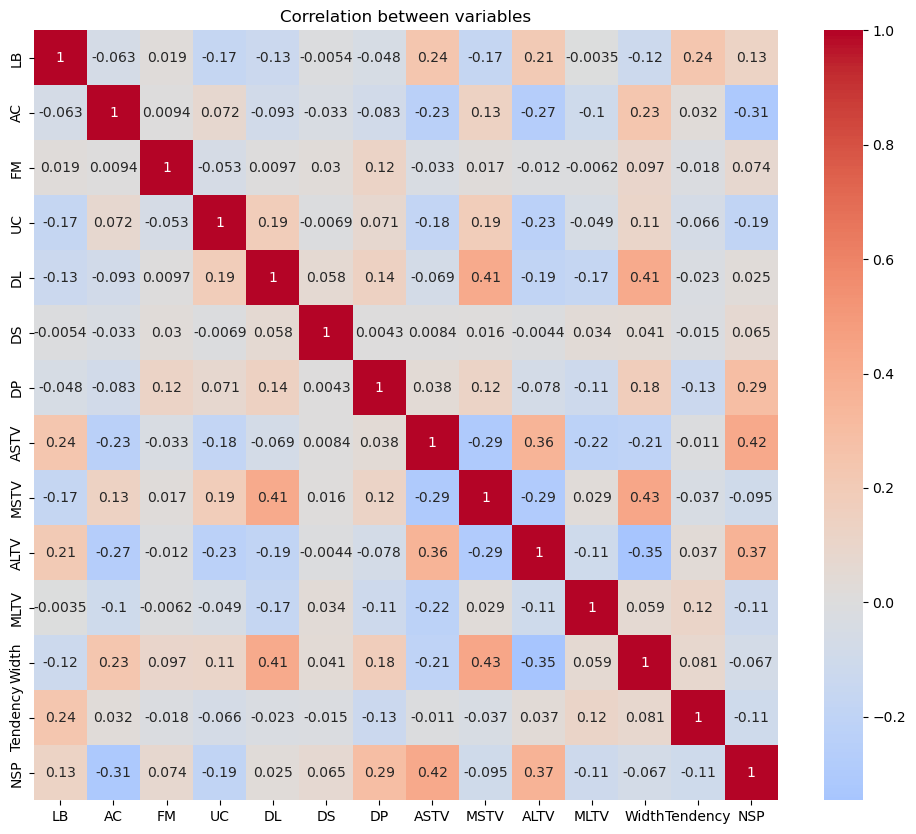

In [24]:
# Visualize the correlation using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between variables')
plt.show()

In [11]:
# Conclusion:
# Key Insights and Patterns:

# - Fetal heart rate variability: The analysis revealed a strong positive correlation between 'ASTV' and 'MSTV'. 
#   This suggests that these two measures capture similar aspects of fetal heart rate dynamics.

# - Baseline heart rate and accelerations: A moderate negative correlation was observed between 'LB' and 'AC'. 
#   Further investigation is needed to understand the physiological mechanisms underlying this association.

# - Fetal state classification: The majority of cases in the dataset were classified as 'normal' (NSP = 1). 
#   However, the distribution of other fetal state classes requires further analysis to identify potential risk factors.

# Impact on Decision-Making and Further Analyses:

# - The insights gained from this exploratory analysis can inform clinical decision-making regarding fetal monitoring and management.
# - The observed relationship between baseline heart rate and accelerations warrants further investigation to determine its clinical significance.
# - This could lead to improved guidelines for interpreting fetal heart rate patterns.

# Overall, this exploratory analysis provides valuable insights into fetal heart rate patterns and their potential implications for fetal well-being.
# The findings can guide further research and inform clinical practice to improve outcomes.